## RCES 2018 Final Project
## A coral-based sea level curve for Barbados over MIS 5 
### Miranda Cashman (mc4428)

Using the Hibbert et al., 2016 coral database for sea level reconstructions, I have created a suite of sea level curves for the island of Barbados over MIS 5 (70 ka to 135 ka).  I have produced 4 sea level curves, each using a different assumption about sea level during MIS 5e (The Last Interglacial, 115 ka to 130 ka), which was used to calculate the uplift rate of the island.  Therefore, each sea level curve uses a different calculated uplift rate.  


#### References
Hibbert et al., 2016

Thompson and Goldstein 2005

O'Leary et al., 2013

Cutler et al., 2003

In [1]:
#Import relevant pacakges 
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import pyplot as plt
%matplotlib inline 

#I downloaded an excel file reader, which is loaded on this line

In [ ]:
#Download link for the data
! wget 'https://ars.els-cdn.com/content/image/1-s2.0-S0277379116301305-mmc2.xlsx'

#reading the excel document into a Pandas dataframe
pd.read_excel('1-s2.0-S0277379116301305-mmc2.xlsx', sheet_name='Database')

In [2]:
#Hibbert et al., 2016 Coral database
hibbert_ds = pd.read_csv('Hibbert_csv.csv', na_values=['unknown', 'not reported', ' not reported', 'not reported ', "can't calculate", 
                                                       "unknown (can't calculate)", "no specific info; info for averaged replicates.", 
                                                       'infinite', 'INFINITE', '>400', np.nan])
#Creating a new dataframe of just Barbados data
barbados = hibbert_ds[hibbert_ds.Location == 'Barbados']

In [ ]:
 'Uplift reported in original references',
 'Uplift error reported in original references',
 'Uplift rate Used        ',
 'Uplift rate Error used        ',
 'Facies',
 'in growth position (Y/N)',
 'in situ',
 '[232Th ] (ppb)',
 '[232Th ] uncert. (±2σ) ',
 '[230Th/238U]ACT back calculated?',
 '[234U/238U]ACT back-calculated?',
 'Reported age (ka)',
 'Reported age uncert. (±2σ)',
 'Reported ẟ234U initial uncert. (±2σ)',
 'Zcp', 
    'Zcp uncert. (±2σ)', 

In [ ]:
list(barbados)


In [3]:
#Clean Hibbert Barbados data
barbados = barbados.drop(columns=['ID', 'Source', 'Latitude', 'Longitude', 'Tectonic Category', 'Comments (uplift)', 'Original elevation datum used', 
                      'How elevation derived?', 'Elevation uncertainty reported in original references', 'Elevation obtained from other references',
                      'Elevation uncertainty reported in other references', 'Comments (elevation)', 'Comments (elevation error)',
                      'Explicitly state reef crest/top targeted in original sampling?', 'additional sample information', 
                      'Stratigraphic constraints available?', 'Species', 'Comments (species)', 'Median depth (m)', 'lower error (95%)',
                      'upper error (95%)', 'lower error (68%)', 'upper error (68%)', 
                       'modern depth distribution (assemblage or other) study undertaken? ', 
                       'type (coral, coralgal, foram, modern depth distribution etc.)', 'scale (site, local, regional)', 
                       'given assemblage (as originally reported)', 'Fossil assemblage (or principal faunal composition) study undertaken? ',
                      'original palaeo-depth interpretation', 'used in original palaeo sea level reconstruction (or error)?',
                      'Replicate', 'comments (replicate)', 'Pa/Th age?', '14C age?', 'Instrument', 'Decay cnsts', 'comments (decay constant)',
                      'Spike Calib', 'comments (spike calibration)', '% calcite', 'determined by', '(232Th /238U)*10^5', '[238U] (ppm)',
                      '[238U] uncert. (±2σ)', '[230Th/234U]ACT', '[230Th/234U]ACT uncert. (±2σ)', 'Reported age comments', 
                       'Recalculated [230Th/238U]ACT', 'Recalculated [230Th/238U]ACT uncert. (±2σ)', 'Recalculated [234U/238U]ACT',
                       'Recalculated [234U/238U]ACT uncert. (±2σ)', 'Recalculated Conventional Age (ka)', 'Comment (age and δ234Uinitial)',
                       'Recalculated Conventional Age uncert. (±2σ)', 'Recalculated Conventional Age uncert. (±1σ)', 
                       'Recalculated Conventional Age uncert. (±2σ) includes decay cnst. uncert.', 
                       'Recalculated Conventional Age uncert. (±1σ) includes decay cnst. uncert.', 'Recalculated ẟ234U initial (‰)',
                       'Recalculated ẟ234U initial uncert. (±2σ)', 'Recalculated ẟ234U initial uncert. (±2σ) includes decay cnst. uncert.',
                       'Zcp Comments', 'PRSL (m)', '+3σPRSL ', '-3σPRSL ', '+2σPRSL', '-2σPRSL', '+1σPRSL', '-1σPRSL',
                       'PRSL Comments (in addition to Zcp comments)']);

barbados = barbados.rename(index=str, columns={'Elevation Used (m)': 'elevation', 
                                                   'Elevation reported in orignial reference': 'ele_ref', 
                                                   'Elevation uncertainty used (m)': 'ele_uncert',
                                                   'decimal latitude': 'dec_lat',
                                                   'decimal longitude': 'dec_lon',
                                                   'Reported ẟ234U initial (‰)': 'd234U_i',
                                                   'Reported [230Th/238U]ACT': 'Th230_U238_act_ref',
                                                   'Reported [230Th/238U]ACT uncert. (±2σ)': 'Th230_U238_act_2sig_ref',
                                                   '[230Th/238U]ACT back calculated?': 'Th230_U238_bc',
                                                   'Reported [234U/238U]ACT': 'U234_U238_act_ref',
                                                   'Reported [234U/238U]ACT uncert. (±2σ)': 'U234_U238_act_2sig_ref',
                                                   #Hibbert
                                                   'Recalculated [230Th/238U]ACT': "Th230_U238_act_hib",
                                                   'Recalculated [230Th/238U]ACT uncert. (±2σ)': 'Th230_U238_act_2sig_hib',
                                                   'Recalculated [234U/238U]ACT': 'U234_U238_act_hib',
                                                   'Recalculated [234U/238U]ACT uncert. (±2σ)': 'U234_U238_act_2sig_hib',
                                              'Terrace Identification': 'terrace'})

headers = ["elevation", "ele_uncert", "dec_lat", "dec_lon", "d234U_i", "Th230_U238_act_ref", "Th230_U238_act_2sig_ref",
          "U234_U238_act_ref", "U234_U238_act_2sig_ref"]
barbados[headers] = barbados[headers].apply(pd.to_numeric)

In [4]:
#Filter out entries with NaN values in ratio categories
barbados = barbados[pd.notnull(barbados['U234_U238_act_ref'])]
barbados = barbados[pd.notnull(barbados['Th230_U238_act_ref'])]

#Filter out very diagenetically altered data
barbados = barbados[barbados.d234U_i < 200]
barbados = barbados[barbados.d234U_i > 90]

In [12]:
#Define decay constants
L238 = 1.55125e-10 #decay constant of 238U
L234 = 2.82203e-6  #decay constant of 234U
L230 = 9.17055e-6  #decay constant of 230Th
U234_U238_SW = 1.1466  #234U/238U of seawater today (also considered intial 234U/238U)

#Create function that calculates conventional age through iteration
def conv_age(Th_U, U_U):
    all_ages = np.linspace(0, 600000, 600000)
    calc_ages = 1/-L230*np.log(1-Th_U+L230/(L230-L234)*(np.exp(-L234*all_ages)-np.exp(-L230*all_ages))*(U_U-1)*np.exp(L234*all_ages))
    residual = abs(calc_ages- all_ages)
    ans = np.argsort(residual)[0]
    return all_ages[ans]


In [13]:
barbados['conv_age'] = (conv_age(barbados['Th230_U238_act_ref'].values, barbados['U234_U238_act_ref'].values))

ValueError: operands could not be broadcast together with shapes (600000,) (482,) 

In [9]:
cage = []
for index, row in barbados.iterrows():
    cage.append(conv_age(row['Th230_U238_act_ref'], row['U234_U238_act_ref']))
    
bindex = barbados.index.tolist()
barbados['conv_age'] = pd.Series(cage, index=bindex)
    

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.


In [14]:
def Thompson_age(conv_age, Th_U, U_U):
    test_age = []
    ans = 3
    residual = 4
    for i in range(1, 100000):
        test_age.append(conv_age-i)
        test_age.append(conv_age+i)
    for j in range(0, len(test_age)):
        f234 = (U_U-U234_U238_SW*np.exp(-L234*test_age[j]))/(1-np.exp(-L234*test_age[j]))
        if f234 < 1:
            m = (1-f234)*(1-np.exp(-L234*test_age[j]))/((1-f234*((f234-1)*(4.754*234/4.184/230)+1))*(1-L230/(L230-L234)*np.exp(-L234*test_age[j])+L234/(L230-L234)*
                                     np.exp(-L230*test_age[j]))+(1-((f234-1)*(4.754*234/4.184/230)+1))*(L230/(L230-L234)*U234_U238_SW*
                                    (np.exp(-L234*test_age[j])-np.exp(-L230*test_age[j]))))
            Tage1 = 1/-L230*np.log(1-Th_U+L230/(L230-L234)*(U234_U238_SW-1)*(np.exp(-L234*test_age[j])-np.exp(-L230*test_age[j]))+1/m*
                                    (U_U-((U234_U238_SW-1)*np.exp(-L234*test_age[j])+1)))
            if residual > abs(Tage1 - test_age[j]):
                residual = abs(Tage1 - test_age[j])
                ans = test_age[j]
        elif f234 > 1:
            f234_rep = 0.975
            Lratio = 0.9730500769
            m = (1-f234_rep)*(1-np.exp(-L234*test_age[j]))/((1-f234_rep*Lratio)*(1-L230/(L230-L234)*np.exp(-L234*test_age[j])+L234/(L230-L234)*np.exp(-L230*test_age[j]))+(1-Lratio)*
                                          (L230/(L230-L234)*U234_U238_SW*(np.exp(-L234*test_age[j])-np.exp(-L230*test_age[j]))))
            Tage2 = 1/-L230*np.log(1-Th_U+L230/(L230-L234)*(U234_U238_SW-1)*(np.exp(-L234*test_age[j])-np.exp(-L230*test_age[j]))+1/m*
                                    (U_U-((U234_U238_SW-1)*np.exp(-L234*test_age[j])+1)))
            if residual > abs(Tage2 - test_age[j]):
                residual = abs(Tage2 - test_age[j])
                ans = test_age[j]
    return ans

In [15]:
barbados['age_ka'] = Thompson_age(barbados['conv_age'].values, barbados['Th230_U238_act_ref'].values, barbados['U234_U238_act_ref']. values)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [11]:
age = []
for index, row in barbados.iterrows():
    age.append(Thompson_age(row['conv_age'], row['Th230_U238_act_ref'], row['U234_U238_act_ref']))

barbados['age_ka'] = pd.Series(age, index=bindex)

KeyboardInterrupt: 

In [38]:
barbados = barbados[pd.notnull(barbados['conv_age'])]
barbados = barbados[pd.notnull(barbados['conv_age'])]


In [42]:
barbados = barbados.sort_values('age_ka')

#Isolate MIS 5
barbados_mis5 = barbados[barbados.age_ka >= 75000]
barbados_mis5 = barbados_mis5[barbados_mis5.age_ka <= 135000]

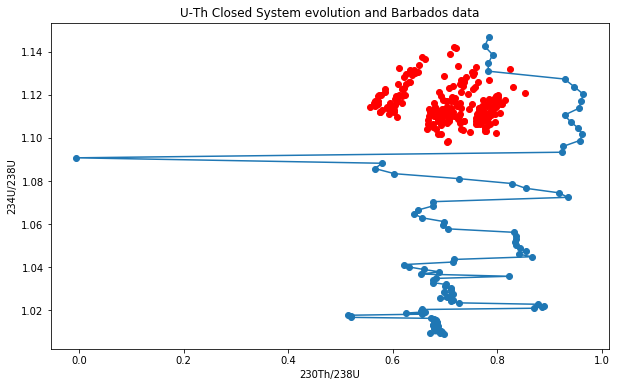

In [47]:
#Calculating the closed system evolution of U-Th decay

U234_U238_ev = []
for i in range(0, 1000000, 10000):
    a = ((U234_U238_SW-1)*(np.exp(-L234 * i))+1)
    U234_U238_ev.append(a)

Th230_U238_ev = []
for i, j in zip(age, U234_U238):
    b = +(1-(np.exp(-L230*i)))+(L230/(L230-L234))*(j-1)*(1-(np.exp(-(L230-L234)*i)))
    Th230_U238_ev.append(b)

#Plotting the closed system
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(Th230_U238_ev, U234_U238_ev, marker='o')
ax.set_xlabel('230Th/238U')
ax.set_ylabel('234U/238U')
ax.set_title('U-Th Closed System evolution and Barbados data')

#Plotting the published values from Hibbert
ax.scatter(barbados_mis5['Th230_U238_act_ref'], barbados_mis5['U234_U238_act_ref'], color='red')

In [ ]:
U234_U238_ev

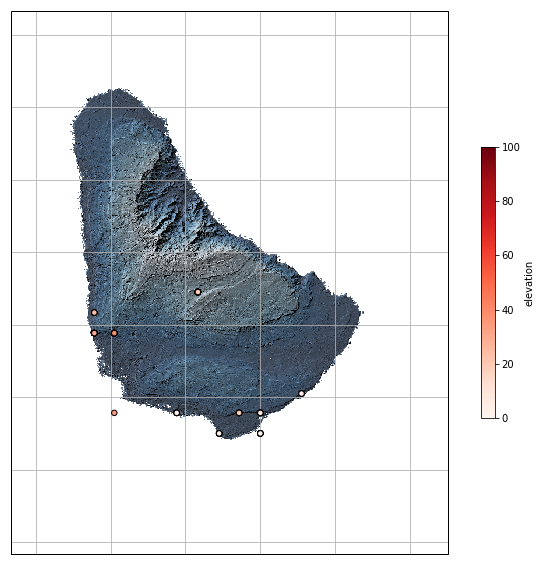

In [44]:
#Plot Barbados
plt.figure(figsize=(12,10))
ax = plt.subplot(projection=ccrs.LambertCylindrical())
ax.set_extent([-59.35, -59.7, 12.95, 13.4], ccrs.PlateCarree())

#Add Barbados DEM
fname = 'barbados.tiff'
img_extent = [-59.8840, -59.1133,  13.371195, 12.95325]
img = plt.imread(fname)
ax.imshow(img, extent=img_extent, transform=ccrs.PlateCarree(), zorder=1)

#Add map features
ax.gridlines(zorder=2)

#Add sample locations
im = ax.scatter(x=barbados_mis5['dec_lon'], y=barbados_mis5['dec_lat'], c=barbados_mis5['elevation'], transform=ccrs.Geodetic(), 
                cmap='Reds', edgecolor='k', s=30, zorder=3, vmin=0, vmax=100)
cbar = plt.colorbar(im, shrink=0.5)
cbar.set_label('elevation', rotation=90)


In [ ]:
#West and south coast characterization
coast = []
for index, row in barbados.iterrows():
    if row['dec_lat'] >= -59.61:
        coast.append('W')
    elif row['dec_lat'] < -59.61:
        coast.append('S')

bindex = barbados.index.tolist()
coastS = pd.Series(coast, index=bindex, name='Coast')
barbados.join(coastS)

In [ ]:
#averaging age and elevation for each terrace

Sbarbados_mis5 = barbados_mis5[barbados_mis5.Coast == 'W']
Wbarbados_mis5 = barbados_mis5[barbados_mis5.Coast == 'S']

av_ageS = Sbarbados_mis5.groupby('terrace').age_ka.mean()
av_eleS = Sbarbados_mis5.groupby('terrace').elevation.mean()
av_ageW = Wbarbados_mis5.groupby('terrace').age_ka.mean()
av_eleW = Wbarbados_mis5.groupby('terrace').age_ka.mean()

#Plot
fig, ax = plt.subplots(ncols=2, figsize=(12,6))
ax1, ax2 = ax
ax1.scatter(av_ageS, av_eleS)
ax1.scatter(Sbarbados_mis5['age_ka'], Sbarbados_mis5['elevation'], color='0.8', s=20)
ax1.set_title('South Barbados average terrace age and elevation')

ax2.scatter(av_ageW, av_eleW)
ax2.scatter(Wbarbados_mis5['age_ka'], Wbarbados_mis5['elevation'], color='0.8', s=20)
ax2.set_title('West Barbados average terrace age and elevation')

In [ ]:
#for terraces that have an average age of 122 to 130, average their elevation and age independently for the west and south coasts
#these will be the MIS5e average terrace elevation and age

Wmis5e_av_age    
Wmis5e_av_ele
Smis5e_av_age
Smis5e_av_ele

#Assuming 6m eustatic, uplift rate calculation
Wuplift_6eust = (Wmis5e_av_ele - 6)/Wmis5e_av_age
Suplift_6eust = (Smis5e_av_ele - 6)/Smis5e_av_age
print('Uplift with 6m eustatic: S=' + str(Suplift_6eust) + ', W=' + str(Wuplift_6eust))

Wuplift_7eust = (Wmis5e_av_ele - 7)/Wmis5e_av_age
Suplift_7eust = (Smis5e_av_ele - 7)/Smis5e_av_age
print('Uplift with 7m eustatic: S=' + str(Suplift_7eust) + ', W=' + str(Wuplift_7eust))

Wuplift_8eust = (Wmis5e_av_ele - 8)/Wmis5e_av_age
Suplift_8eust = (Smis5e_av_ele - 8)/Smis5e_av_age
print('Uplift with 8m eustatic: S=' + str(Suplift_8eust) + ', W=' + str(Wuplift_8eust))

Wuplift_9eust = (Wmis5e_av_ele - 9)/Wmis5e_av_age
Suplift_9eust = (Smis5e_av_ele - 9)/Smis5e_av_age
print('Uplift with 9m eustatic: S=' + str(Suplift_9eust) + ', W=' + str(Wuplift_9eust))

In [ ]:
#Full MIS 5 Barbados dataset sea level curve 

SL_6eust = []
SL_7eust = []
SL_8eust = []
SL_9eust = []
for index, row in barbados_mis5.iterrow():
    if row['Coast'] == 'W':
        s1 = row['elevation'] - (row['age_ka']*Wuplift_6eust)
        s2 = row['elevation'] - (row['age_ka']*Wuplift_7eust)
        s3 = row['elevation'] - (row['age_ka']*Wuplift_8eust)
        s4 = row['elevation'] - (row['age_ka']*Wuplift_9eust)
        SL_6eust.append(s1)
        SL_7eust.append(s2)
        SL_8eust.append(s3)
        SL_9eust.append(s4)
    elif row['Coast'] == 'S':
        s1 = row['elevation'] - (row['age_ka']*Suplift_6eust)
        s2 = row['elevation'] - (row['age_ka']*Suplift_7eust)
        s3 = row['elevation'] - (row['age_ka']*Suplift_8eust)
        s4 = row['elevation'] - (row['age_ka']*Suplift_9eust)
        SL_6eust.append(s1)
        SL_7eust.append(s2)
        SL_8eust.append(s3)
        SL_9eust.append(s4)

#Create sea level data frame under the four scenarios
data = {'SL_6eust': SL_6eust, 'SL_7eust': SL_7eust,
       'SL_8eust': SL_8eust, 'SL_9uest': SL_9eust}
bindex = barbados.index.tolist()
SL = pd.DataFrame(data, index=bindex)

#Join the SL scenario data to the main dataframe
barbados_mis5.join(SL)


In [ ]:
#Average SL and age for each terrace under each condition
ter_age = barbados_mis5.groupby('terrace').age_ka.mean()
ter_SL_6eust = barbados_mis5.groupby('terrace').SL_6eust.mean()
ter_SL_7eust = barbados_mis5.groupby('terrace').SL_7eust.mean()
ter_SL_8eust = barbados_mis5.groupby('terrace').SL_8eust.mean()
ter_SL_9eust = barbados_mis5.groupby('terrace').SL_9eust.mean()

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12,10))
ax1, ax2, ax3, ax4 = ax

#plot 6 eustatic scenario SL curve
ax1.scatter(barbados_mis5.age_ka, barbados_mis5.SL_6eust, color='0.8')
ax1.scatter(ter_age, ter_SL_6eust)
ax1.set_title('Sea level curve ___ uplift (6m eustatic)')

#plot 7 eustatic scenario SL curve
ax2.scatter(barbados_mis5.age_ka, barbados_mis5.SL_7eust, color='0.8')
ax2.scatter(ter_age, ter_SL_7eust)
ax2.set_title('Sea level curve ___ uplift (7m eustatic)')

#plot 8 eustatic scenario SL curve
ax3.scatter(barbados_mis5.age_ka, barbados_mis5.SL_8eust, color='0.8')
ax3.scatter(ter_age, ter_SL_8eust)
ax3.set_title('Sea level curve ___ uplift (8m eustatic)')

#plot 9 eustatic scenario SL curve
ax4.scatter(barbados_mis5.age_ka, barbados_mis5.SL_9eust, color='0.8')
ax4.scatter(ter_age, ter_SL_9eust)
ax4.set_title('Sea level curve ___ uplift (9m eustatic)')

In [ ]:
#Moderately filtered dataset (d234initial is closed system ONLY)
bmis5_mfilt = barbados[barbados.d234U_i >= (146.8-8)]
bmis5_mfilt = bmis5_mfilt[barbados_mis5.age_ka <= (146.8+8)]


In [ ]:
#Heavily filtered dataset 
#lat/lon is NOT estimated, elevation in the original reference = elevation used, 
#corals in growth position and in situ, low/no 232Th, d234 initial is closed system